In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f_levels(x, levels=None):
    if levels is None:
        levels = [
            (0.1, 0.1),
            (0.7, 0.6),
            (0.8, 0.8)
        ]
    for thre, level in levels:
        if x < thre:
            return level
    return 1

def f_discrete(x, n_levels=5):
    r = np.linspace(0, 1, n_levels)
    for y in r:
        if x < y:
            return y
    return 1

def f(x):
    return 4*x**3 - 6*x**2 + 3*x

In [4]:
imsize = (32, 32)

In [5]:
x0, y0 = center = (15.5, 15.5)

In [6]:
r = radius = 10
r2 = r**2

In [7]:
light = np.array([-1, 1, 3])
light = v = vx, vy, vz = light/np.linalg.norm(light)

In [8]:
sphere_col = (.8, 0.2, 0.2)
light_col = (1., 0.5, 1.)

In [10]:
def get_h2(x, y, x0, y0, r2):
    return r2 - (x-x0)**2 - (y-y0)**2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


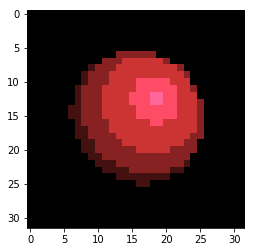

In [11]:
levels = [
    (0.15, 0.15),
    (0.3, 0.3),
    (0.75, 0.6),
    (0.97, 0.9)
]

levels = [
    (0.93, 0),
    (0.99, 0.2),
    (1., 0.4)
]

X = np.zeros((*imsize, 3))
for x, row in enumerate(X):
    for y, _ in enumerate(row):
        h2 = get_h2(x, y, x0, y0, r2)
        if h2 < 0:
            continue
        h = np.sqrt(h2)
        dot = np.dot((x-x0, y-y0, h), v)/r
        level_mat = f_discrete(dot, 4)# f_levels(dot, levels)#f_levels(dot, levels)
        level_spec = f_levels(dot, levels)
        if dot < 0:
            continue
        X[x, y] = [
            level_mat*sphere_col[0] + level_spec*light_col[0],
            level_mat*sphere_col[1] + level_spec*light_col[1],
            level_mat*sphere_col[2] + level_spec*light_col[2]]
            

plt.imshow(X)

# Multiple spheres and interpolation